## neutral graph

1. import full directed network: article_neu1.gml
2. save as undirected network: u_neu.gml

- save u_nodes_neu.csv
- save u_Gc_neutral.gml
- save u_Gc_nodes_neu.csv

# 1.

In [1]:
# 1_network_df

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from glob import glob

plt.style.use('ggplot')
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

gml_files = glob('../output/network/article_neu1.gml')

In [2]:
def calculate_graph_inf(graph):
    graph.name = filename
    info = nx.info(graph)
    print info

def highest_centrality(cent_dict):
    """Returns a tuple (node,value) with the node
    with largest value from centrality dictionary."""
    # create ordered tuple of centrality data
    cent_items = [(b,a) for (a,b) in cent_dict.iteritems()]
    # sort in descending order
    cent_items.sort()
    cent_items.reverse()
    return tuple(reversed(cent_items[0]))

---
# 2. convert to undirected

In [3]:
for graph_num, gml_graph in enumerate(gml_files):
    dgraph = nx.read_gml(gml_graph)
    ugraph = dgraph.to_undirected() # to undirected graph
    U = dgraph.to_undirected(reciprocal=True)
    e = U.edges()
    ugraph.add_edges_from(e)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(dgraph)
    calculate_graph_inf(ugraph)

----------
../output/network/article_neu1.gml
Name: article_neu1.gml
Type: MultiDiGraph
Number of nodes: 201
Number of edges: 241
Average in degree:   1.1990
Average out degree:   1.1990
Name: article_neu1.gml
Type: MultiGraph
Number of nodes: 201
Number of edges: 241
Average degree:   2.3980


In [4]:
# save undirected gml
#nx.write_gml(ugraph, "../output/network/u_neu.gml")

dgraph = directed
ugraph = undirected

# undirected graph

In [5]:
# load
gml_files = glob('../output/network/u_neu.gml')

In [6]:
# ugraph = undirected; dgraph = directed
for graph_num, gml_graph in enumerate(gml_files):
    ugraph = nx.read_gml(gml_graph)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(ugraph)

----------
../output/network/u_neu.gml
Name: u_neu.gml
Type: MultiGraph
Number of nodes: 201
Number of edges: 241
Average degree:   2.3980


---
# 3. all nodes table

In [7]:
# 2_node_df: list all nodes and centrality
data_columns = ['name',
                'sentiment'
                ]
data = pd.DataFrame(columns = data_columns)
combined_df = pd.DataFrame()

In [8]:
# calculate variables and save into list
sent = "neutral"    
deg_cent = nx.degree_centrality(ugraph)
bet_cent = nx.betweenness_centrality(ugraph)
clo_cent = nx.closeness_centrality(ugraph)
graph_values = {'name':filename,
                'sentiment':sent
                }
data = data.append(graph_values, ignore_index=True)

degree = nx.degree(ugraph)
deg_df = pd.DataFrame.from_dict(degree, orient = 'index')
deg_df.columns = ['degree']

# degree centrality
deg_cent = nx.degree_centrality(ugraph)
dc_df = pd.DataFrame.from_dict(deg_cent, orient = 'index')
dc_df.columns = ['deg cent']

# betweenness centrality
bet_cent = nx.betweenness_centrality(ugraph)
bc_df = pd.DataFrame.from_dict(bet_cent, orient = 'index')
bc_df.columns = ['bet cent']

# closeness centrality
clo_cent = nx.closeness_centrality(ugraph)
cc_df = pd.DataFrame.from_dict(clo_cent, orient = 'index')
cc_df.columns = ['clo cent']

# concat node frames into node_df
frames = [deg_df, dc_df, bc_df, cc_df]
node_df = pd.concat(frames, axis = 1)
node_df.index.name = 'node'
node_df = node_df.reset_index()

values = pd.DataFrame(graph_values, columns = ('name', 'sentiment'), index = [0])

# df = merges graph_values with node_df for single graph and fill NaNs
df = pd.concat([values, node_df], axis = 1)
df = df.fillna(method='ffill')
combined_df = combined_df.append(df)

In [9]:
# print entire network
combined_df

,name,sentiment,node,degree,deg cent,bet cent,clo cent
0,u_neu.gml,neutral,7-11 year olds,2,0.010,0.015611,0.147149
1,u_neu.gml,neutral,Alfred and Lisa Claire Dwoskin,1,0.005,0.000000,0.138278
2,u_neu.gml,neutral,Americans,1,0.005,0.000000,0.130533
3,u_neu.gml,neutral,Andrew Wakefield,5,0.025,0.101658,0.133796
4,u_neu.gml,neutral,Australia,1,0.005,0.000000,0.131723
5,u_neu.gml,neutral,Barry Segal,1,0.005,0.000000,0.093953
6,u_neu.gml,neutral,Ben Allen,4,0.020,0.000034,0.132569
7,u_neu.gml,neutral,CDC,4,0.020,0.070193,0.160556
8,u_neu.gml,neutral,California,1,0.005,0.000000,0.132084
9,u_neu.gml,neutral,Chairwoman Carol Liu,2,0.010,0.008492,0.132326


In [10]:
# save
#combined_df.to_csv('../output/df/u_nodes_neu.csv')

---
# 4. Draw undirected and directed network

In [11]:
# 7_graph_calculation
def drawIt(graph, what = 'graph'):
    nsize = graph.number_of_nodes()
    print "Drawing %s of size %s:" % (what, nsize)
    
    if nsize > 20:
        plt.figure(figsize=(10, 10))
        if nsize > 40:
            nx.draw_spring(graph, with_labels = True, node_size = 70, font_size = 12)
        else:
            nx.draw_spring(graph, with_labels = True)
    else:
        nx.draw_spring(graph, with_labels = True)
    plt.show()

# for undirected graphs
def describeGraph(graph):
    components = sorted(nx.connected_components(graph), key = len, reverse = True)
    cc = [len(c) for c in components]
    subgraphs = list(nx.connected_component_subgraphs(graph))
    params = (graph.number_of_edges(),graph.number_of_nodes(),len(cc))
    print "Graph has %s edges, %s nodes, %s connected components\n" % params
    drawIt(graph)
    for sub in components:
        drawIt(graph.subgraph(sub), what = 'component')

# for directed graphs
def describeGraph_d(graph):
    components = sorted(nx.weakly_connected_components(graph), key = len, reverse = True)
    cc = [len(c) for c in components]
    subgraphs = list(nx.weakly_connected_component_subgraphs(graph))
    params = (graph.number_of_edges(),graph.number_of_nodes(),len(cc))
    print "Graph has %s edges, %s nodes, %s connected components\n" % params
    drawIt(graph)
    for sub in components:
        drawIt(graph.subgraph(sub), what = 'component')


Graph has 241 edges, 201 nodes, 12 connected components

Drawing graph of size 201:


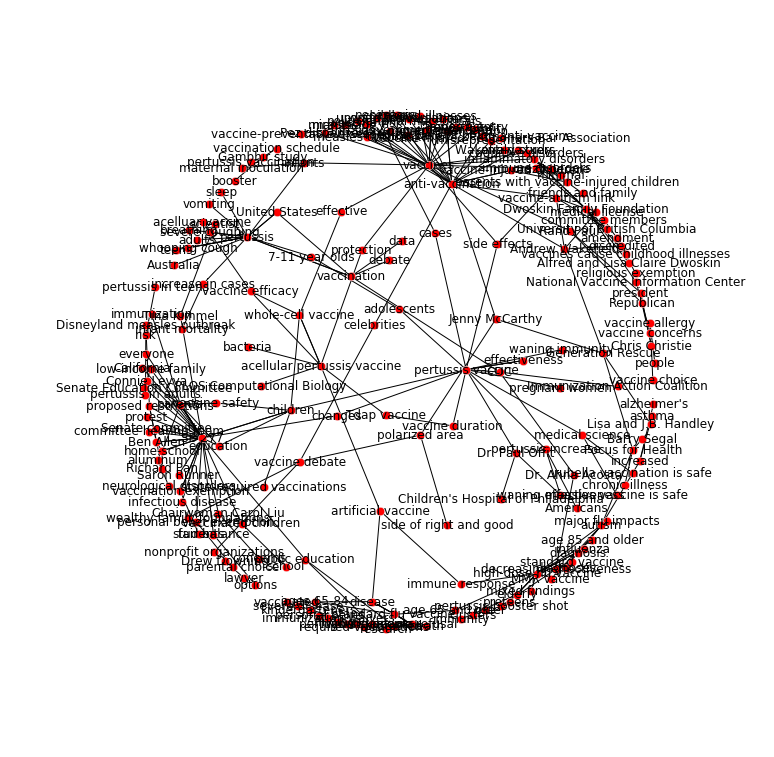

Drawing component of size 171:


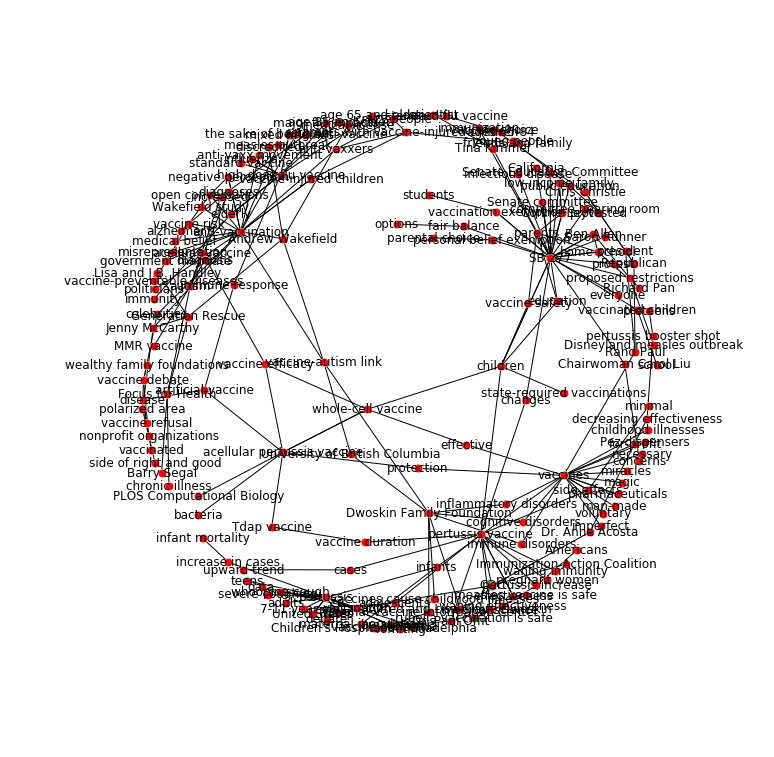

Drawing component of size 4:


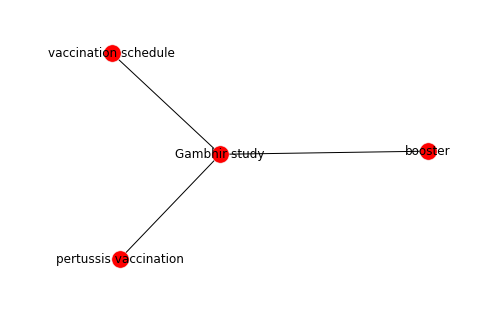

Drawing component of size 4:


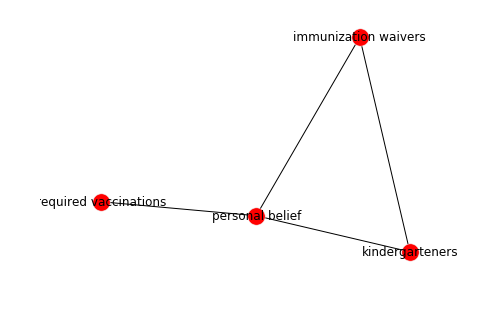

Drawing component of size 4:


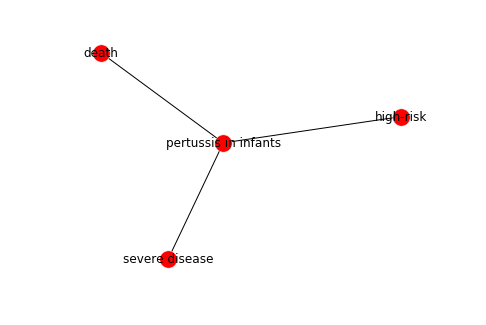

Drawing component of size 3:


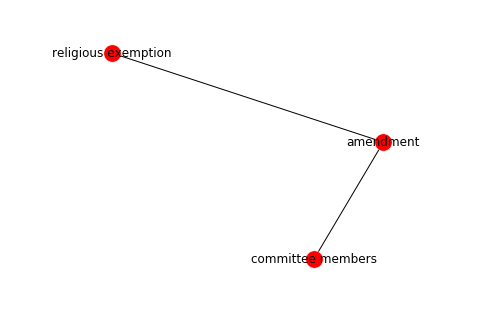

Drawing component of size 3:


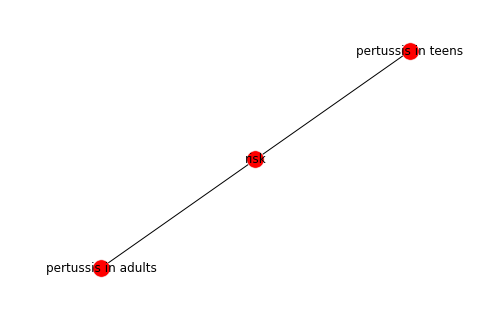

Drawing component of size 2:


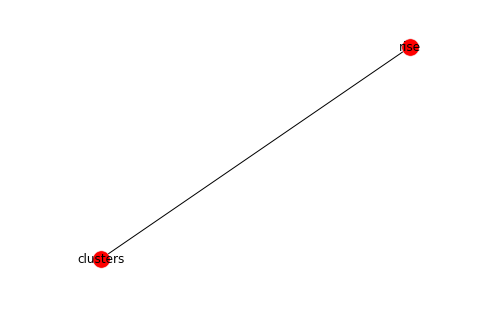

Drawing component of size 2:


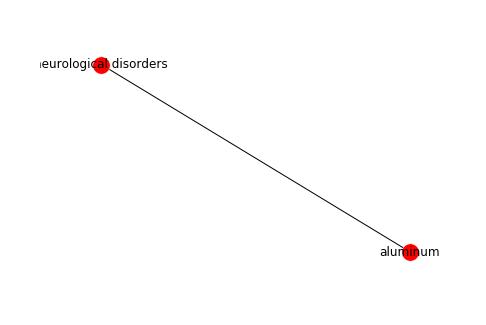

Drawing component of size 2:


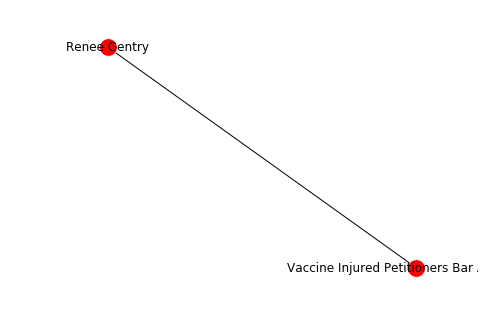

Drawing component of size 2:


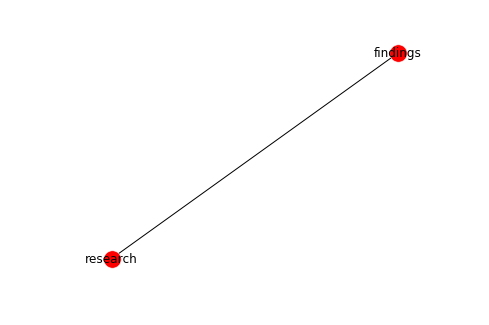

Drawing component of size 2:


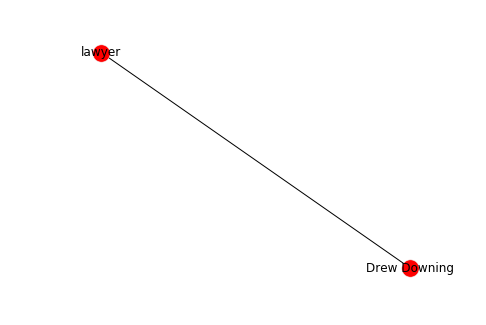

Drawing component of size 2:


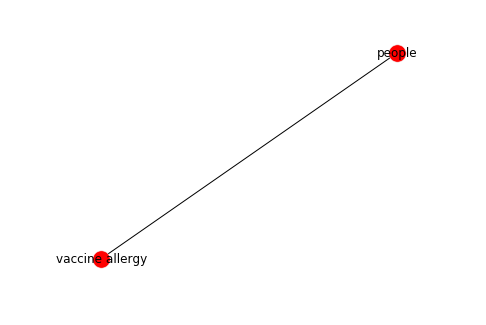

In [12]:
# UNDIRECTED network graph
describeGraph(ugraph)

Graph has 241 edges, 201 nodes, 12 connected components

Drawing graph of size 201:


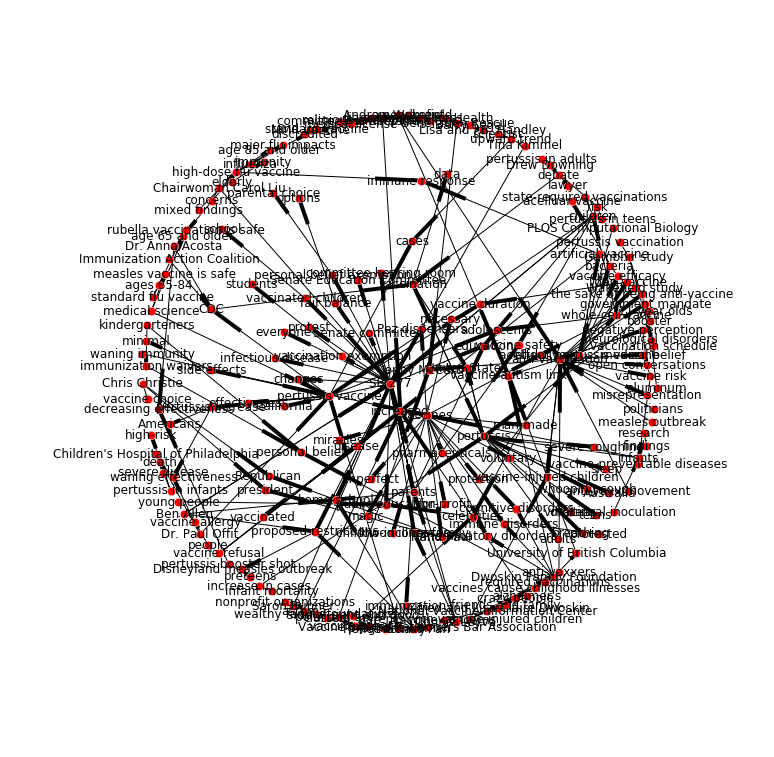

Drawing component of size 171:


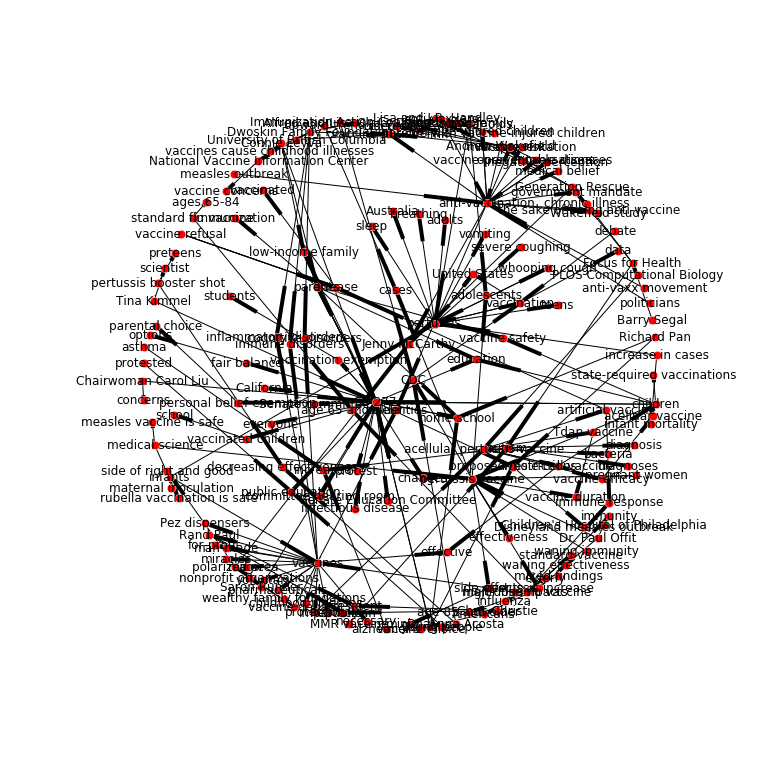

Drawing component of size 4:


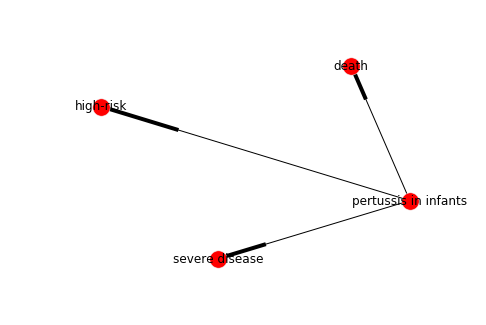

Drawing component of size 4:


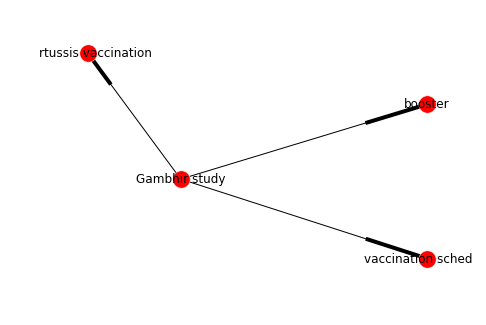

Drawing component of size 4:


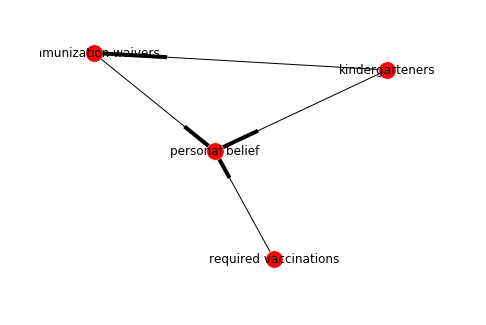

Drawing component of size 3:


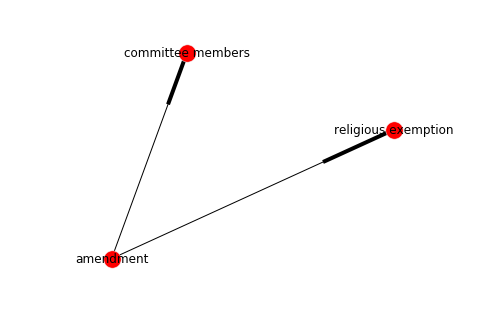

Drawing component of size 3:


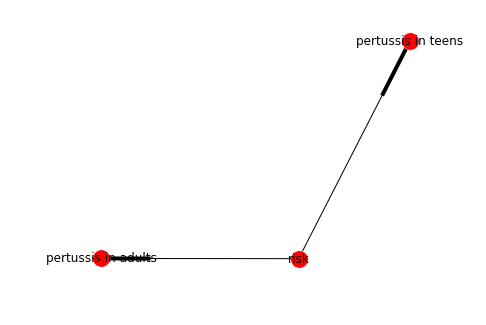

Drawing component of size 2:


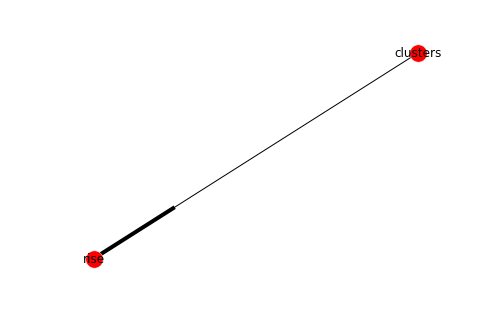

Drawing component of size 2:


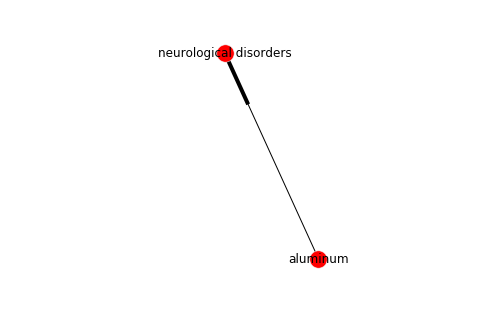

Drawing component of size 2:


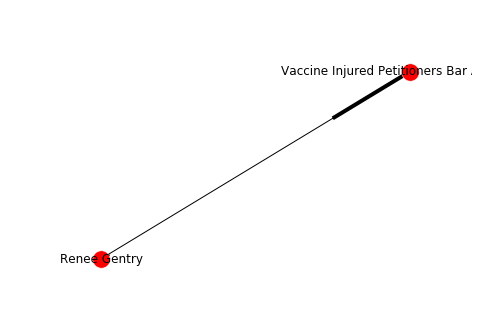

Drawing component of size 2:


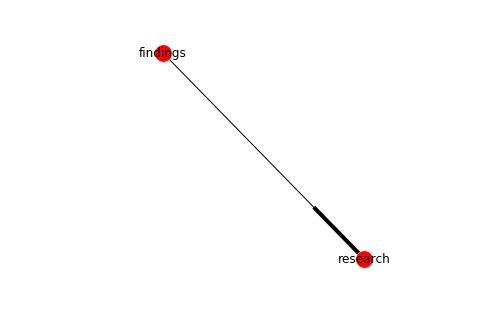

Drawing component of size 2:


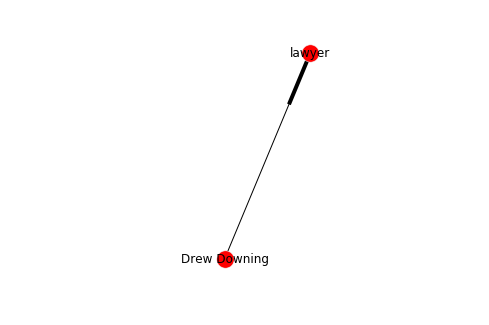

Drawing component of size 2:


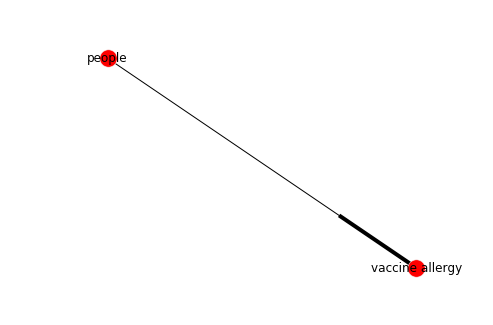

In [13]:
# DIRECTED network graph
describeGraph_d(dgraph)

## Undirected graph components

In [14]:
# list of connected components by size (undirected graph)
connected_components = [len(c) for c in sorted(nx.connected_components(ugraph), key=len, reverse=True)]

# generate connected components as subgraphs (undirected graph)
subgraphs = list(nx.connected_component_subgraphs(ugraph))

# greatest component (undirected MultiGraph)
u_Gc = max(nx.connected_component_subgraphs(ugraph), key=len)
u_Gc.name = "undirected Gc"

In [15]:
print "connected components = ", connected_components
print nx.info(u_Gc)

connected components =  [171, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2]
Name: undirected Gc
Type: MultiGraph
Number of nodes: 171
Number of edges: 221
Average degree:   2.5848


## ~~Directed graph components~~

In [16]:
# use directed dgraph
components = sorted(nx.weakly_connected_components(dgraph), key = len, reverse = True)
cc = [len(c) for c in components]

# generate connected components as subgraphs 
subgraphs = list(nx.weakly_connected_component_subgraphs(dgraph))

# greatest component
d_Gc = max(nx.weakly_connected_component_subgraphs(dgraph), key=len)
d_Gc.name = "directed Gc"

In [17]:
print "connected components = ", cc
print nx.info(d_Gc)

connected components =  [171, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2]
Name: directed Gc
Type: MultiDiGraph
Number of nodes: 171
Number of edges: 221
Average in degree:   1.2924
Average out degree:   1.2924


# 5. Greatest component graph

In [18]:
# finally, greatest components for undirected and directed graphs
print nx.info(u_Gc)
print nx.info(d_Gc)

Name: undirected Gc
Type: MultiGraph
Number of nodes: 171
Number of edges: 221
Average degree:   2.5848
Name: directed Gc
Type: MultiDiGraph
Number of nodes: 171
Number of edges: 221
Average in degree:   1.2924
Average out degree:   1.2924


In [19]:
# save Gc
#nx.write_gml(u_Gc, "../output/network/u_Gc_neutral.gml")
#nx.write_gml(d_Gc, "../output/network/d_Gc_neutral.gml")

---
# ~~6. network stats for DIRECTED GC~~

In [ ]:
# load directed Gc
Gc_files = glob('../output/network/d_Gc_neutral.gml')

network_data_columns = ['name',
                    'sentiment',
                    '# nodes',
                    '# edges',
                    #'avg deg',
                    'density',
                    'deg assort coef', 
                    'avg deg cent',
                    'avg bet cent',
                    'avg clo cent',
                    'high deg cent',
                    'high bet cent',
                    'high clo cent',
                    'avg node conn',
                    '# conn comp',
                    'gc size'
                    ]
network_data = pd.DataFrame(columns = network_data_columns)

In [ ]:
# Gc_files
for graph_num, gml_graph in enumerate(Gc_files):
    graph = nx.read_gml(gml_graph)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(graph)
    
    # calculate variables
    sent = "neu"
    nodes = nx.number_of_nodes(graph)
    edges = nx.number_of_edges(graph)
    density = float("{0:.4f}".format(nx.density(graph)))
    avg_deg_cen = np.array(nx.degree_centrality(graph).values()).mean()
    avg_bet_cen = np.array(nx.betweenness_centrality(graph).values()).mean()
    avg_clo_cen = np.array(nx.closeness_centrality(graph).values()).mean()
    #avg_deg = float("{0:.4f}".format(in_deg + out_deg))
    avg_node_con = float("{0:.4f}".format((nx.average_node_connectivity(graph))))
    deg_assort_coeff = float("{0:.4f}".format((nx.degree_assortativity_coefficient(graph))))
    conn_comp = nx.number_weakly_connected_components(graph) # ugraph
    deg_cen = nx.degree_centrality(graph)
    bet_cen = nx.betweenness_centrality(graph)
    clo_cen = nx.closeness_centrality(graph)
    highest_deg_cen = highest_centrality(deg_cen)
    highest_bet_cen = highest_centrality(bet_cen)
    highest_clo_cen = highest_centrality(clo_cen)
    Gc = len(max(nx.weakly_connected_component_subgraphs(graph), key=len))

    # save variables into list
    graph_values = {'name':filename,
                    'sentiment':sent,
                    '# nodes':nodes,
                    '# edges':edges,
                    #'avg deg':avg_deg,
                    'density':density,
                    'deg assort coef':deg_assort_coeff,
                    'avg deg cent':"%.4f" % avg_deg_cen,
                    'avg bet cent':"%.4f" % avg_bet_cen,
                    'avg clo cent':"%.4f" % avg_clo_cen,
                    'high deg cent':highest_deg_cen,
                    'high bet cent':highest_bet_cen,
                    'high clo cent':highest_clo_cen,
                    'avg node conn':avg_node_con,
                    '# conn comp':conn_comp,
                    'gc size':Gc
                    }
    network_data = network_data.append(graph_values, ignore_index=True)

In [ ]:
# print network data for greatest component
network_data

In [ ]:
# save
#network_data.to_csv('../output/df/d_Gc_neu.csv')

# 7. network stats for UNDIRECTED GC

In [20]:
# load UNdirected Gc
Gc_files = glob('../output/network/u_Gc_neutral.gml')

network_data_columns = ['name',
                    'sentiment',
                    '# nodes',
                    '# edges',
                    #'avg deg',
                    'density',
                    'deg assort coef', 
                    'avg deg cent',
                    'avg bet cent',
                    'avg clo cent',
                    'high deg cent',
                    'high bet cent',
                    'high clo cent',
                    'avg node conn'
                    #'# conn comp',
                    #'gc size'
                    ]
network_data = pd.DataFrame(columns = network_data_columns)

In [21]:
# Gc_files
for graph_num, gml_graph in enumerate(Gc_files):
    graph = nx.read_gml(gml_graph)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(graph)
    
    # calculate variables
    sent = "neu"
    nodes = nx.number_of_nodes(graph)
    edges = nx.number_of_edges(graph)
    density = float("{0:.4f}".format(nx.density(graph)))
    avg_deg_cen = np.array(nx.degree_centrality(graph).values()).mean()
    avg_bet_cen = np.array(nx.betweenness_centrality(graph).values()).mean()
    avg_clo_cen = np.array(nx.closeness_centrality(graph).values()).mean()
    #avg_deg = float("{0:.4f}".format(in_deg + out_deg))
    avg_node_con = float("{0:.4f}".format((nx.average_node_connectivity(graph))))
    deg_assort_coeff = float("{0:.4f}".format((nx.degree_assortativity_coefficient(graph))))
    #conn_comp = nx.number_weakly_connected_components(graph) # ugraph
    deg_cen = nx.degree_centrality(graph)
    bet_cen = nx.betweenness_centrality(graph)
    clo_cen = nx.closeness_centrality(graph)
    highest_deg_cen = highest_centrality(deg_cen)
    highest_bet_cen = highest_centrality(bet_cen)
    highest_clo_cen = highest_centrality(clo_cen)
    #Gc = len(max(nx.weakly_connected_component_subgraphs(graph), key=len))

    # save variables into list
    graph_values = {'name':filename,
                    'sentiment':sent,
                    '# nodes':nodes,
                    '# edges':edges,
                    #'avg deg':avg_deg,
                    'density':density,
                    'deg assort coef':deg_assort_coeff,
                    'avg deg cent':"%.4f" % avg_deg_cen,
                    'avg bet cent':"%.4f" % avg_bet_cen,
                    'avg clo cent':"%.4f" % avg_clo_cen,
                    'high deg cent':highest_deg_cen,
                    'high bet cent':highest_bet_cen,
                    'high clo cent':highest_clo_cen,
                    'avg node conn':avg_node_con
                    #'# conn comp':conn_comp,
                    #'gc size':Gc
                    }
    network_data = network_data.append(graph_values, ignore_index=True)

----------
../output/network/u_Gc_neutral.gml
Name: u_Gc_neutral.gml
Type: MultiGraph
Number of nodes: 171
Number of edges: 221
Average degree:   2.5848


In [22]:
# print network data for greatest component
network_data

,name,sentiment,# nodes,# edges,density,deg assort coef,avg deg cent,avg bet cent,avg clo cent,high deg cent,high bet cent,high clo cent,avg node conn
0,u_Gc_neutral.gml,neu,171.0,221.0,0.0152,-0.2807,0.0152,0.0342,0.1533,"(SB 277, 0.194117647059)","(vaccines, 0.574881076691)","(vaccines, 0.233516483516)",1.035


In [23]:
# save
#network_data.to_csv('../output/df/u_Gc_neu.csv')

---
# Gc nodes table

In [24]:
#gml_files = glob('../output/network/d_Gc_neutral.gml')
gml_files = glob('../output/network/u_Gc_neutral.gml')

In [25]:
# 2_node_df: list all nodes and centrality
data_columns = ['name',
                'sentiment'
                ]
data = pd.DataFrame(columns = data_columns)
#combined_df = pd.DataFrame()

In [26]:
for graph_num, gml_graph in enumerate(gml_files):
    graph = nx.read_gml(gml_graph)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(graph)

    # calculate variables and save into list
    sent = "neu"    
    deg_cent = nx.degree_centrality(graph)
    bet_cent = nx.betweenness_centrality(graph)
    clo_cent = nx.closeness_centrality(graph)
    graph_values = {'name':filename,
                    'sentiment':sent
                    }
    data = data.append(graph_values, ignore_index=True)

    degree = nx.degree(graph)
    deg_df = pd.DataFrame.from_dict(degree, orient = 'index')
    deg_df.columns = ['degree']
    # degree centrality
    deg_cent = nx.degree_centrality(graph)
    dc_df = pd.DataFrame.from_dict(deg_cent, orient = 'index')
    dc_df.columns = ['deg cent']
    # betweenness centrality
    bet_cent = nx.betweenness_centrality(graph)
    bc_df = pd.DataFrame.from_dict(bet_cent, orient = 'index')
    bc_df.columns = ['bet cent']
    # closeness centrality
    clo_cent = nx.closeness_centrality(graph)
    cc_df = pd.DataFrame.from_dict(clo_cent, orient = 'index')
    cc_df.columns = ['clo cent']
    # concat node frames into node_df
    frames = [deg_df, dc_df, bc_df, cc_df]
    node_df = pd.concat(frames, axis = 1)
    node_df.index.name = 'node'
    node_df = node_df.reset_index()

    values = pd.DataFrame(graph_values, columns = ('name', 'sentiment'), index = [0])
    
    # df = merges graph_values with node_df for single graph and fill NaNs
    df = pd.concat([values, node_df], axis = 1)
    df = df.fillna(method='ffill')
    #combined_df = combined_df.append(df)

----------
../output/network/u_Gc_neutral.gml
Name: u_Gc_neutral.gml
Type: MultiGraph
Number of nodes: 171
Number of edges: 221
Average degree:   2.5848


In [27]:
# print neutral gc nodes
df

,name,sentiment,node,degree,deg cent,bet cent,clo cent
0,u_Gc_neutral.gml,neu,7-11 year olds,2,0.011765,0.021627,0.173116
1,u_Gc_neutral.gml,neu,Alfred and Lisa Claire Dwoskin,1,0.005882,0.000000,0.162679
2,u_Gc_neutral.gml,neu,Americans,1,0.005882,0.000000,0.153568
3,u_Gc_neutral.gml,neu,Andrew Wakefield,5,0.029412,0.140828,0.157407
4,u_Gc_neutral.gml,neu,Australia,1,0.005882,0.000000,0.154968
5,u_Gc_neutral.gml,neu,Barry Segal,1,0.005882,0.000000,0.110533
6,u_Gc_neutral.gml,neu,Ben Allen,4,0.023529,0.000046,0.155963
7,u_Gc_neutral.gml,neu,CDC,4,0.023529,0.097239,0.188889
8,u_Gc_neutral.gml,neu,California,1,0.005882,0.000000,0.155393
9,u_Gc_neutral.gml,neu,Chairwoman Carol Liu,2,0.011765,0.011765,0.155678


In [ ]:
# save
##df.to_csv('../output/df/d_Gc_nodes_neu.csv')

#df.to_csv('../output/df/u_Gc_nodes_neu.csv')

---
# Cutsets

In [28]:
print "Greatest component size =", len(graph)

Greatest component size = 171


In [29]:
# returns all minimum k cutsets of an undirected graph
# i.e., the set(s) of nodes of cardinality equal to the node connectivity of G
# thus if removed, would break G into two or more connected components

#cutsets = list(nx.all_node_cuts(graph))  # must be undirected

print "Greatest component size =", len(graph)
#print "# of cutsets =", len(cutsets)

# returns a set of nodes or edges of minimum cardinality that disconnects G
min_ncut = nx.minimum_node_cut(graph)
min_ecut = nx.minimum_edge_cut(graph)

print "Min node cut =", min_ncut
print "Min edge cut =", min_ecut

# min cuts with source and target
print nx.minimum_node_cut(graph, s='vaccines', t='autism')
print nx.minimum_edge_cut(graph, s='vaccines', t='autism')

Greatest component size = 171
Min node cut = set([u'anti-vaccination'])
Min edge cut = set([(u'artificial vaccine', u'acellular pertussis vaccine')])
set([u'Focus for Health'])
set([(u'Focus for Health', u'autism')])


In [30]:
# read edge labels in min cut for Gc
# change source and target
a = nx.minimum_edge_cut(graph, s='vaccines', t='autism')
#a = nx.minimum_edge_cut(graph)

labels = nx.get_edge_attributes(graph,'edge')
edgelabels = {}
for e in labels.keys():
    e1 = e[0:2]
    edgelabels[e1]=labels[e]

for e in a:
    if edgelabels.has_key(e):
        print e,edgelabels[e]
    else:
        rev_e = e[::-1]
        print rev_e, edgelabels[rev_e]

(u'Focus for Health', u'autism') is dedicated to advocacy, education, investigation and research that explores epidemic of


- - -

# full network node centrality

In [31]:
# make sure you're using the right graph
print "gml_files = ", gml_files
print "gml_graph = ", gml_graph

gml_files =  ['../output/network/u_Gc_neutral.gml']
gml_graph =  ../output/network/u_Gc_neutral.gml


In [32]:
# FULL UNDIRECTED
graph = nx.read_gml('../output/network/u_neu.gml')  

## graph = nx.read_gml('../output/network/article_neu1.gml')  # full network directed

print nx.info(graph)

Name: article_neu1.gml
Type: MultiGraph
Number of nodes: 201
Number of edges: 241
Average degree:   2.3980


In [33]:
# degree centrality
dc = nx.degree_centrality(graph)
dc_df = pd.DataFrame.from_dict(dc, orient = 'index')
dc_df.columns = ['degree cent']
dc_df = dc_df.sort_values(by = ['degree cent'])
#dc_df

# betweenness centrality
bc = nx.betweenness_centrality(graph)
bc_df = pd.DataFrame.from_dict(bc, orient = 'index')
bc_df.columns = ['betweenness cent']
bc_df = bc_df.sort_values(by = ['betweenness cent'])
#bc_df

# closeness centrality
cc = nx.closeness_centrality(graph)
cc_df = pd.DataFrame.from_dict(cc, orient = 'index')
cc_df.columns = ['closeness cent']
cc_df = cc_df.sort_values(by = ['closeness cent'])
#cc_df

In [34]:
dc_df

,degree cent
lawyer,0.005
protested,0.005
diagnosis,0.005
pertussis in teens,0.005
misrepresentation,0.005
alzheimer's,0.005
medical belief,0.005
vomiting,0.005
maternal inoculation,0.005
severe disease,0.005


In [35]:
bc_df

,betweenness cent
influenza,0.000000
infectious disease,0.000000
pharmaceuticals,0.000000
people,0.000000
California,0.000000
Saron Runner,0.000000
Senate committee,0.000000
vaccine concerns,0.000000
preteens,0.000000
rubella vaccination is safe,0.000000


In [36]:
cc_df

,closeness cent
Vaccine Injured Petitioners Bar Association,0.005000
findings,0.005000
lawyer,0.005000
Drew Downing,0.005000
rise,0.005000
Renee Gentry,0.005000
research,0.005000
people,0.005000
aluminum,0.005000
clusters,0.005000


# Gc node centrality

In [37]:
# GC undirected
graph = nx.read_gml('../output/network/u_Gc_neutral.gml')  

## graph = nx.read_gml('../output/network/d_Gc_neutral.gml')  # gc directed

print nx.info(graph)

Name: undirected Gc
Type: MultiGraph
Number of nodes: 171
Number of edges: 221
Average degree:   2.5848


In [38]:
# degree centrality
dc = nx.degree_centrality(graph)
dc_df = pd.DataFrame.from_dict(dc, orient = 'index')
dc_df.columns = ['degree cent']
dc_df = dc_df.sort_values(by = ['degree cent'])
#dc_df

# betweenness centrality
bc = nx.betweenness_centrality(graph)
bc_df = pd.DataFrame.from_dict(bc, orient = 'index')
bc_df.columns = ['betweenness cent']
bc_df = bc_df.sort_values(by = ['betweenness cent'])
#bc_df

# closeness centrality
cc = nx.closeness_centrality(graph)
cc_df = pd.DataFrame.from_dict(cc, orient = 'index')
cc_df.columns = ['closeness cent']
cc_df = cc_df.sort_values(by = ['closeness cent'])
#cc_df

In [39]:
dc_df

,degree cent
Barry Segal,0.005882
vaccine-preventable diseases,0.005882
mixed findings,0.005882
Saron Runner,0.005882
severe coughing,0.005882
rubella vaccination is safe,0.005882
imperfect,0.005882
preteens,0.005882
California,0.005882
Alfred and Lisa Claire Dwoskin,0.005882


In [40]:
bc_df

,betweenness cent
influenza,0.000000
severe coughing,0.000000
rubella vaccination is safe,0.000000
imperfect,0.000000
preteens,0.000000
Senate committee,0.000000
California,0.000000
pharmaceuticals,0.000000
Alfred and Lisa Claire Dwoskin,0.000000
infectious disease,0.000000


In [41]:
cc_df

,closeness cent
alzheimer's,0.091398
asthma,0.091398
ages 65-84,0.095721
MMR vaccine,0.100295
diagnosis,0.100295
diagnoses,0.100295
increased,0.100532
immunity,0.105525
standard flu vaccine,0.105787
friends and family,0.108557
